<a href="https://colab.research.google.com/github/FelipeTufaile/Misc_DS_Notebooks/blob/main/Notebook/Operations_Research_using_Pyomo_v00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Operations Research**

**Summary**: Operations research (OR) is a field of study that utilizes mathematical modeling, statistical analysis, and optimization techniques to solve complex problems and make informed decisions in various domains. It aims to improve the efficiency, effectiveness, and overall performance of operational systems.

OR involves the application of quantitative methods to analyze and optimize processes, systems, and decision-making. It encompasses a wide range of techniques and methodologies, including mathematical programming, simulation, queuing theory, network analysis, and forecasting.

The main objective of operations research is to provide decision-makers with objective and data-driven insights to help them make informed choices and allocate resources optimally. By formulating real-world problems into mathematical models, OR practitioners can analyze different scenarios, evaluate trade-offs, and identify the best possible solutions or strategies.

**Rerences**:

● KITTEL, Charles. The nature and development of operations research. Science, v. 105, n. 2719, p.150-153, 1947. \

● HILLIER, Frederick S.; LIEBERMAN, Gerald J. Introdução à pesquisa operacional. McGraw Hill Brasil, 2013. \

● TAHA, Hamdy A. Operations Research. Pearson Education, 2008.

**Python Libraries**:

pyomo, cplex.

In [44]:
# Installing libraries
!pip install pyomo
!pip install cplex
!apt-get install -y -qq glpk-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
# Importing pyomo
from pyomo.environ import *
from pyomo.core.base.set_types import NonNegativeIntegers, Binary

**Example 01:**

Consider a furniture factory that produces three types of furniture: **single table**, **double table**, and **chairs**.


*   Each single table demands 10kg of wood, 5 hours to assemble and 2 hours for painting;
*   Each double table demands 15kg of wood, 8 hours to assemble and 3 hours for painting;
*   Each chair demands 5kg of wood, 2 hours to assemble and 1 hours for painting;

The factory has 500kg of wood, 200 hours of assembling time and 50 hours of painting time. Furthermore, each single table is sold for USD 300, each double table is sold for USD 500 and each chair is sold for USD 100. What should be the number of single table, double table and chair produced if the company wants to maximize its revenue?

In [46]:
# Creating a ConcreteModel class
model = ConcreteModel()

# Adding variables to the model
model.qt_single_table   = Var(domain=NonNegativeIntegers)  # variable to count number of single tables
model.qt_double_table   = Var(domain=NonNegativeIntegers)  # variable to count number of double tables
model.qt_chair          = Var(domain=NonNegativeIntegers)  # variable to count number of chairs

# Adding constraints
model.constraint_wood           = Constraint(expr = 10*model.qt_single_table + 15*model.qt_double_table + 5*model.qt_chair <= 500)
model.constraint_work_hours     = Constraint(expr =  5*model.qt_single_table +  8*model.qt_double_table + 2*model.qt_chair <= 200)
model.constraint_painting_hours = Constraint(expr =  2*model.qt_single_table +  3*model.qt_double_table + 1*model.qt_chair <=  50)

# Adding objective
model.revenue = Objective(expr = 300*model.qt_single_table + 500*model.qt_double_table + 100*model.qt_chair, sense = maximize)

# Building solver
solver = SolverFactory("glpk")
solver.solve(model)

{'Problem': [{'Name': 'unknown', 'Lower bound': 8300.0, 'Upper bound': 8300.0, 'Number of objectives': 1, 'Number of constraints': 3, 'Number of variables': 3, 'Number of nonzeros': 9, 'Sense': 'maximize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': '1', 'Number of created subproblems': '1'}}, 'Error rc': 0, 'Time': 0.00636601448059082}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [47]:
# Printing results
print(f"Income: {model.revenue()}")
print(f"Qtd. Single Table: {model.qt_single_table()}")
print(f"Qtd. Double Table: {model.qt_double_table()}")
print(f"Qtd. Chair: {model.qt_chair()}")

Income: 8300.0
Qtd. Single Table: 1.0
Qtd. Double Table: 16.0
Qtd. Chair: 0.0


**Example 02:** \

A higher education institution has opened a call for support for technology-based projects and has a budget of R$4000. Knowing the costs for implementing each project and the expected return, model a binary solution problem for project selection. Assume that at least three projects need to be selected.

| Projeto   | Investiment  | Return    |
|-----------|--------------|-----------|
| Projeto 1 | USD 1000     | USD 2000  |
| Projeto 2 | USD 1500     | USD 2500  |
| Projeto 3 | USD 2000     | USD 3000  |
| Projeto 4 | USD 1200     | USD 2300  |
| Projeto 5 | USD 1700     | USD 2900  |

In [48]:
# Creating a ConcreteModel class
model = ConcreteModel()

# Adding variables to the model
model.slct_prjct_1 = Var(domain=Binary)  # flag to indicate selection of project 1
model.slct_prjct_2 = Var(domain=Binary)  # flag to indicate selection of project 2
model.slct_prjct_3 = Var(domain=Binary)  # flag to indicate selection of project 3
model.slct_prjct_4 = Var(domain=Binary)  # flag to indicate selection of project 4
model.slct_prjct_5 = Var(domain=Binary)  # flag to indicate selection of project 5

# Adding objective
model.revenue = Objective(expr = 2000*model.slct_prjct_1 + 2500*model.slct_prjct_2  + 3000*model.slct_prjct_3 + 2300*model.slct_prjct_4 + 2900*model.slct_prjct_5, sense = maximize)

# Adding constraints
model.max_cost = Constraint(expr = 1000*model.slct_prjct_1 + 1500*model.slct_prjct_2  + 2000*model.slct_prjct_3 + 1200*model.slct_prjct_4 + 1700*model.slct_prjct_5 <= 4000)
model.min_prjct =  Constraint(expr = model.slct_prjct_1 + model.slct_prjct_2  + model.slct_prjct_3 + model.slct_prjct_4 + model.slct_prjct_5 >= 3)

# Building solver
solver = SolverFactory("cplex_direct") # Solver for binary variables
solver.solve(model)

{'Problem': [{'Name': '', 'Lower bound': 7200.0, 'Upper bound': 7200.0, 'Number of objectives': 1, 'Number of constraints': 2, 'Number of variables': 5, 'Number of binary variables': 5, 'Number of integer variables': 0, 'Number of continuous variables': 0, 'Number of nonzeros': None, 'Sense': -1}], 'Solver': [{'Name': 'CPLEX 22.1.1.0', 'Status': 'ok', 'Wallclock time': 0.02541828155517578, 'Termination condition': 'optimal'}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [49]:
# Printing results
print(f"Revenue: {model.revenue()}")
print(f"Project 1 selection flag: {model.slct_prjct_1()}")
print(f"Project 2 selection flag: {model.slct_prjct_2()}")
print(f"Project 3 selection flag: {model.slct_prjct_3()}")
print(f"Project 4 selection flag: {model.slct_prjct_4()}")
print(f"Project 5 selection flag: {model.slct_prjct_5()}")

Revenue: 7200.0
Project 1 selection flag: 1.0
Project 2 selection flag: 0.0
Project 3 selection flag: 0.0
Project 4 selection flag: 1.0
Project 5 selection flag: 1.0


**Example 03:** \
A museum is setting up a new exhibition, and the layout for the structure is represented in the figure below. A guard positioned at a door can monitor two adjacent rooms. The museum wants to position the smallest possible number of guards to monitor all the rooms. Solve this problem using an integer programming model.

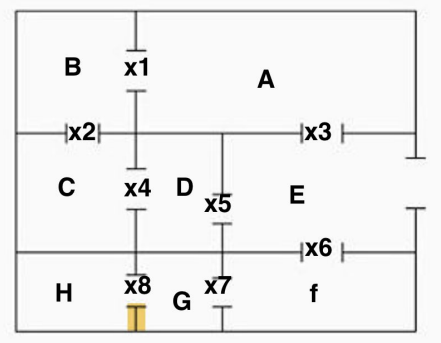

In [55]:
from PIL import Image
im = Image.open('/content/LayoutMuseum.PNG')
im.show()

In [56]:
# Creating a ConcreteModel class
model = ConcreteModel()

# Adding variables to the model
model.x1 = Var(domain=Binary)  # flag to indicate wheter door 1 has a security agent
model.x2 = Var(domain=Binary)  # flag to indicate wheter door 2 has a security agent
model.x3 = Var(domain=Binary)  # flag to indicate wheter door 3 has a security agent
model.x4 = Var(domain=Binary)  # flag to indicate wheter door 4 has a security agent
model.x5 = Var(domain=Binary)  # flag to indicate wheter door 5 has a security agent
model.x6 = Var(domain=Binary)  # flag to indicate wheter door 6 has a security agent
model.x7 = Var(domain=Binary)  # flag to indicate wheter door 7 has a security agent
model.x8 = Var(domain=Binary)  # flag to indicate wheter door 8 has a security agent

# Adding objective: Minimize the number of security agent (worst case scenario: every door has an agent)
model.security = Objective(expr = model.x1 + model.x2 + model.x3 + model.x4 + model.x5 + model.x6 + model.x7 + model.x8, sense = minimize)

# Adding constraints: Indicate which rooms can share a security agent
model.romm_A = Constraint(expr = model.x1 + model.x3 >= 1) # Because of room A
model.romm_B = Constraint(expr = model.x1 + model.x2 >= 1) # Because of room B
model.romm_C = Constraint(expr = model.x2 + model.x4 >= 1) # Because of room C
model.romm_D = Constraint(expr = model.x4 + model.x5 >= 1) # Because of room D
model.romm_E = Constraint(expr = model.x5 + model.x6 >= 1) # Because of room E
model.romm_F = Constraint(expr = model.x6 + model.x7 >= 1) # Because of room F
model.romm_G = Constraint(expr = model.x7 + model.x8 >= 1) # Because of room G
model.romm_H = Constraint(expr =            model.x8 == 1) # Because of room H

# Building solver
solver = SolverFactory("cplex_direct") # Solver for binary variables
solver.solve(model)

{'Problem': [{'Name': '', 'Lower bound': 4.0, 'Upper bound': 4.0, 'Number of objectives': 1, 'Number of constraints': 8, 'Number of variables': 8, 'Number of binary variables': 8, 'Number of integer variables': 0, 'Number of continuous variables': 0, 'Number of nonzeros': None, 'Sense': 1}], 'Solver': [{'Name': 'CPLEX 22.1.1.0', 'Status': 'ok', 'Wallclock time': 0.001577138900756836, 'Termination condition': 'optimal'}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [57]:
# Printing results
print(f"Number of security agents: {model.security()}")
print(f"Door 1 security agent flag: {model.x1()}")
print(f"Door 2 security agent flag: {model.x2()}")
print(f"Door 3 security agent flag: {model.x3()}")
print(f"Door 4 security agent flag: {model.x4()}")
print(f"Door 5 security agent flag: {model.x5()}")
print(f"Door 6 security agent flag: {model.x6()}")
print(f"Door 7 security agent flag: {model.x7()}")
print(f"Door 8 security agent flag: {model.x8()}")

Number of security agents: 4.0
Door 1 security agent flag: 1.0
Door 2 security agent flag: 0.0
Door 3 security agent flag: 0.0
Door 4 security agent flag: 1.0
Door 5 security agent flag: 0.0
Door 6 security agent flag: 1.0
Door 7 security agent flag: 0.0
Door 8 security agent flag: 1.0
